# Taller No. 6 - Inteligencia Artificial

## Integrantes:

- Luis Carlos Jordan Hurtado
- Kelly Fernanda Vásquez Zapata
- Jhonattan Leandro Bedoya Mejia

## 1. Lectura y escritura de imágenes
Hay que utilizar la función cv2.imread() para leer una imágen. La imágen debe estar en el directorio de trabajo o debe proporcionarse la ruta absoluta de la imagen (o relativa).

El segundo argumento de la función es un flag que especifica la forma en la que la imagen debe ser leída.

cv2.IMREAD_COLOR: Carga la imagen a color. Si la imagen posee transparencias serán desechadas. Es el flag por defecto.
cv2.IMREAD_GRAYSCALE: Carga la imagen en modo escala de grises.
cv2.IMREAD_UNCHANGED: Carga la imagen incluyendo el canal alpha.
Para poder escribir/guardar una nueva imagen, hay que utilizar la función cv2.imwrite().

## Ejemplo No. 1

In [1]:
import cv2

# Cargar
ruta_imagen = 'foto.jpg'
imagen = cv2.imread(ruta_imagen)

# Guardar una copia como png
ruta_imagen_copia = 'foto-copia.png'
cv2.imwrite(ruta_imagen, imagen)

# Cargar la copia
imagen_copia = cv2.imread(ruta_imagen_copia)

# Mostrar
cv2.imshow('Original', imagen)
cv2.imshow('Copia', imagen_copia)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: C:\projects\opencv-python\opencv\modules\highgui\src\window.cpp:331: error: (-215) size.width>0 && size.height>0 in function cv::imshow


## Ejercicio No. 1

Descargar una imagen de internet, cargarla y guardar una copia en blanco y negro

### SOLUCIÓN 1

In [ ]:
#EJERCICIO FINALIZADO

import cv2
 
image = cv2.imread("images/clouds.jpg")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Guardar una copia como png
cv2.imwrite('images/clouds-gray.jpg',gray_image)

cv2.imshow("Original", image)
cv2.imshow("Copia en Grises", gray_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 2. Conversión entre imágenes y raw bytes

Conceptualmente, un byte es un entero que se encuentra en el rango [0, 255]. En las aplicaciones actuales, un píxel es representado normalmente por un byte por canal, aunque también pueden haber otras representaciones.

Una imagen OpenCV es un array 2D o 3D de tipo numpy.array. Una imagen en escala de grises de 8 bits es un array 2D que contiene valores para cada byte. Una imagen a color RGB es un array 3D, que también contiene valores para cada byte. Es posible acceder a esos valores utilizando una expresión como la siguiente:

image[0, 0] o image[0, 0, 0]
El primer índice representa la coordenada y (fila), siendo el 0 el valor que está más arriba. El segundo índice representa la coordenada x (columna), siendo el valor 0 el que está más a la izquierda. El tercer índice (en imágenes RGB) representa el canal de color.

Por ejemplo, una imagen en escala de grises con un píxel blanco en la esquina superior izquierda, image[0, 0] sería 255. Para una imagen RGB con un píxel de color azul en la esquina superior izquierda, image[0, 0] sería [255, 0, 0]. También se puede utilizar el método setitem para asignar valores a cada píxel, ya que esta función es más eficiente. Pero, como veremos a continuación, normalmente realizaremos operaciones sobre conjuntos de píxeles más grandes y no trabajaremos píxel a píxel de forma manual.

Sabiendo que una imagen tiene 8 bits por canal, podemos realizar la conversión a un bytearray de python, que es unidimensional. De igual forma, dado un bytearray que contenga bytes en el orden adecuado, podemos realizar la conversión a un objeto de tipo numpy.array, que en efecto es una imagen.

gray_image = numpy.array(gray_byte_aray).reshape(height, width)
bgr_image = numpy.array(bgr_byte_array).reshape(height, width, 3)

Las propiedades de una imagen incluyen numero de filas, de columnas y canales, tipos de datos, número de píxeles, etc.

Forma: img.shape
Número de píxeles: img.size
Tipo de datos: img.dtype

## Ejemplo No. 2

Conversión de un bytearray que contiene bytes aleatorios en una imagen en escala de grises y en una imagen RGB.

In [ ]:
import cv2
import numpy
import os

# Make an array of 120,000 random bytes.
random_byte_array = bytearray(os.urandom(120000))
flat_numpy_array = numpy.array(random_byte_array)

# Convert the array to make a 400x300 grayscale image.
gray_image = flat_numpy_array.reshape(300, 400)
cv2.imshow('Random gray', gray_image)

# Convert the array to make a 400x100 color image.
bgr_image = flat_numpy_array.reshape(100, 400, 3)
cv2.imshow('Random color', bgr_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

## Ejercicio No. 2

Cargar una imagen y denotar sus propiedades

### SOLUCIÓN 2

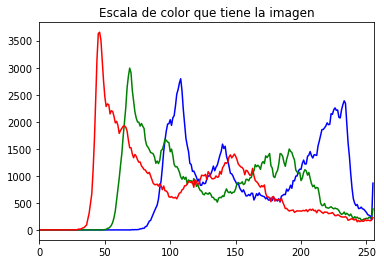

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

imagen = cv2.imread('images/clouds.jpg', -1)
cv2.imshow('Nubes',imagen)

color = ('b','g','r')
for canal, col in enumerate(color):
    histr = cv2.calcHist([imagen],[canal],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Escala de color que tiene la imagen')
plt.show()

while True:
    tecla = cv2.waitKey(0) & 0xFF     
    if tecla == 27: break # ESC para salir.
cv2.destroyAllWindows()

## 3. Introducción al manejo de vídeos

Para capturar un vídeo, es necesario crear un objeto de tipo VideoCapture. Su argumento puede ser tanto el índice del dispositivo como el nombre del fichero.

El índice del dispositivo es el número que identifica qué camara capturar. Como normalmente sólo suele haber una cámara conectada, se suele utilizar el identificador "0" para capturar de ella.

El método cap.read() devuelve un valor booleano (True/False). Si el frame se leyó correctamente, devolverá True. De esta forma, se puede comprobar cuándo se ha llegado al final de la lectura del vídeo comprobando este parámetro.

A veces, el objeto VideoCapture puede no haber logrado la inicialización de la captura correctamente. Por ello, es mejor comprobar si se ha inicializado o no a través del método cap.isOpened(). Si el resultado es True es que sí se ha podido abrir la captura.

## Ejemplo No. 3

In [ ]:
import numpy as np
import cv2

video_file = 'examples/videos/roller-coaster.mp4'
cap = cv2.VideoCapture(video_file)

while (cap.isOpened()):
    # Capture frame-by-frame
    ret, frame = cap.read()

    if ret == True:
        # Operations on the frame
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Display the resulting frame
        cv2.imshow('frame', gray)
    
        # Exit?
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
cv2.destroyAllWindows()

## Ejercicio No. 3

Descargar un vídeo de https://videos.pexels.com/video-license y mostrarlo en dos ventanas, en escala de grises y en colo original

### SOLUCIÓN 3

In [ ]:
#EJERCICIO FINALIZADO 

import numpy as np
import cv2

video_file = 'video/video.mp4'
cap = cv2.VideoCapture(video_file)

while (cap.isOpened()):
    # Capture frame-by-frame
    ret, frame = cap.read()

    if ret == True:
        # Operations on the frame
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Display the resulting frame
        cv2.imshow('Gris', gray)
        cv2.imshow('Color', frame)
    
        # Exit?
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
cv2.destroyAllWindows()

## 4. Propiedades adicionales

Además, también es posible acceder a algunas de las propiedades del vídeo utilizando el método cap.get(prop_id) donde prop_id es un número [0, 18] que denota una propiedad del vídeo. Por último, hay que destacar que algunos de esos valores pueden ser modificados mediante el método cap.set(prop_id, value). En el siguiente enlace están descritas todas las propiedades:

http://docs.opencv.org/3.1.0/d8/dfe/classcv_1_1VideoCapture.html#aeb1644641842e6b104f244f049648f94

## Ejemplo No. 4

Mostrar el número de FPS del vídeo

In [ ]:
import numpy as np
import cv2

video_file = 'examples/videos/roller-coaster.mp4'
cap = cv2.VideoCapture(video_file)

# Properties
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
color = (255,255,255)
thickness = 1

if cv2.__version__.startswith('2.4'):
    height_prop = cv2.cv.CV_CAP_PROP_FRAME_HEIGHT 
else:
    height_prop = cv2.CAP_PROP_FRAME_HEIGHT

if cv2.__version__.startswith('2.4'):
    fps_prop = cv2.cv.CV_CAP_PROP_FPS
else:
    fps_prop = cv2.CAP_PROP_FPS

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        # Text position
        height = int(cap.get(height_prop))
        position = (50, height - 50)
        
        # Frames per second
        fps = "{0:.2f}".format(cap.get(fps_prop))
        text = "FPS: " + fps
        
        # Put text
        cv2.putText(frame, text, position, font, font_scale, color, thickness)

        # Display
        cv2.imshow("Video", frame)
        
        # Exit?
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Release everything if job is finished
cap.release()
cv2.destroyAllWindows()

## Ejercicio No. 4

Descargar un vídeo de https://videos.pexels.com/video-license y mostrar las propiedades más relevantes sobre el propio vídeo mientras se reproduce.

### SOLUCION 4

In [ ]:
#EJERCICIO FINALIZADO

import numpy as np
import cv2

video_file = 'video/video.mp4'
cap = cv2.VideoCapture(video_file)

# Properties
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
color = (255,255,255)
thickness = 2

if cv2.__version__.startswith('2.4'):
    height_prop = cv2.cv.CV_CAP_PROP_FRAME_HEIGHT 
else:
    height_prop = cv2.CAP_PROP_FRAME_HEIGHT

if cv2.__version__.startswith('2.4'):
    fps_prop = cv2.cv.CV_CAP_PROP_FPS
else:
    fps_prop = cv2.CAP_PROP_FPS

if cv2.__version__.startswith('2.4'):
    sec_prop = cv2.cv.CV_CAP_PROP_POS_MSEC
else:
    sec_prop = cv2.CAP_PROP_POS_MSEC
    
if cv2.__version__.startswith('2.4'):
    width_prop = cv2.cv.CV_CAP_PROP_FRAME_WIDTH
else:
    width_prop = cv2.CAP_PROP_FRAME_WIDTH

while(cap.isOpened()):
    ret, frame = cap.read()
    #CALCULO Y MUESTRA DE FPS
    if ret == True:
        # Text position
        height = int(cap.get(height_prop))
        pos_F = (50, height - 50)
        # Frames per second
        fps = "{0:.2f}".format(cap.get(fps_prop))
        text = "FPS: " + fps        
        # Put text
        cv2.putText(frame, text, pos_F, font, font_scale, color, thickness)
    
    #CALCULO Y MUESTRA DE SEGUNDOS TRANSCURRIDOS DEL VIDEO
    if ret == True:
        # Text position
        pos_S = (50, height - 30)
        # Frames per second      
        segs = "{0:.2f}".format(cap.get(sec_prop))
        text = "SEG: " + segs
        # Put text
        cv2.putText(frame, text, pos_S, font, font_scale, color, thickness)
        
    #CALCULO Y MUESTRA DE ANCHO DEL VIDEO
    if ret == True:
        # Text position
        pos_W = (50, height - 10)
        # Frames per second      
        ancho = "{0:.2f}".format(cap.get(width_prop))
        alto = "{0:.2f}".format(cap.get(height_prop))

        text = "Ancho x Alto: "+ alto + "x" + ancho
        
        # Put text
        cv2.putText(frame, text, pos_W, font, font_scale, color, thickness)

        # Display
        cv2.imshow("Video", frame)
        
        # Exit?
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Release everything if job is finished
cap.release()
cv2.destroyAllWindows()

## 5. Captura de vídeo desde la webcam

El índice del dispositivo es el número que identifica qué camara capturar. Como normalmente sólo suele haber una cámara conectada, se suele utilizar el identificador "0" para capturar de ella.

## Ejemplo No. 5

In [ ]:
import numpy as np
import cv2

webcam_id = 0
cap = cv2.VideoCapture(webcam_id)

while(cap.isOpened()):
    # Capture frame-by-frame
    ret, frame = cap.read()
    if ret == True:
        # Operations on the frame
        v_frame = cv2.flip(frame, 1)
        h_frame = cv2.flip(frame, 0)
        
        # Display
        cv2.imshow("Original", frame)
        cv2.imshow("Vertical flip", v_frame)
        cv2.imshow("Horizontal flip", h_frame)

        # Exit?
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Release everything if job is finished
cap.release()
cv2.destroyAllWindows()

## Ejercicio No. 5

Capturar la camara del computador y mostrar el video procesado en grises

### SOLUCIÓN 5

In [ ]:
#EJERCICIO TERMINADO

import numpy as np
import cv2

webcam_id = 0
cap = cv2.VideoCapture(webcam_id)

while(cap.isOpened()):
    # Capture frame-by-frame
    ret, frame = cap.read()
    if ret == True:
        # Operations on the frame
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        v_frame = cv2.flip(gray, 1)
        h_frame = cv2.flip(gray, 0)
        
        # Display
        cv2.imshow("Original", frame)
        cv2.imshow("Vertical flip", v_frame)
        cv2.imshow("Horizontal flip", h_frame)

        # Exit?
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Release everything if job is finished
cap.release()
cv2.destroyAllWindows()

## 6. Filtrado de imágenes - Convolución 2D

Las imágenes pueden ser filtradas por varios tipos de filtros, tales como filtros paso-bajo, filtros paso-alto, etc.

Un filtro paso-bajo atenúa las frecuencias altas y mantiene sin variaciones las frecuencias bajas. El resultado en el dominio espacial es equivalente al de un filtro de suavizado, donde las altas frecuencias que son filtradas se corresponden con los cambios fuertes de intensidad. Consigue reducir el ruido suavizando las transiciones existentes.

Un filtro paso-alto atenúa las frecuencias bajas manteniendo invariables las frecuencias altas. Puesto que las altas frecuencias corresponden en las imágenes a cambios bruscos de densidad, este tipo de filtros es usado en la detección de bordes en el dominio espacial, ya que estos contienen gran cantidad de dichas frecuencias. Refuerza los contrastes que se encuentran en la imagen.

El proceso de filtrado puede llevarse a cabo sobre los dominios de frecuencia y/o espacio. De aquí en adelante nos centraremos en filtros en el dominio del espacio.

Las operaciones espaciales de filtrado se definen en un entorno de vecindad del punto a transformar (x,y). Para realizar un filtrado en el dominio del espacio se realiza una convolución (barrido) del kernel sobre la imagen. Para ello se sigue el Teorema de Convolución en el espacio: g(x,y)=h(x,y)∗f(x,y)

<img src="http://nbviewer.jupyter.org/github/CAChemE/opencv-python/blob/master/images/dominio-espacial.png">


La máscara o kernel es una matriz de coeficientes donde:

El entorno del punto que se considera en la imagen para obtener el resultado final g(x,y) está determinado por el tamaño y forma de la máscara.
El tipo de filtrado está determinado por el contenido de la máscara.

<img src="http://nbviewer.jupyter.org/github/CAChemE/opencv-python/blob/master/images/kernel.jpg">

OpenCV proporciona la función cv2.filter2D() para realizar la convolución de una imagen con un kernel determinado. Por ejemplo, un kernel de tamaño 3x3 para un filtro de promedio se puede definir de la siguiente forma:

<p style="text-align: center;">
$K = \frac{1}{9} \left[ \begin{array}{ccc}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1 \\ \end{array} \right]$
</p> 

El procedimiento de filtrado es el siguiente: para cada píxel de la imagen, una ventana de tamaño 3x3 es centrada en él, realizándose el sumatorio de la multiplicación del kernel por los píxeles contiguos, dividiéndose entre 9. Esto equivale a realizar la media de los valores de los píxeles de dentro de la ventana. Esta operación se realiza para cada uno de los píxeles de la imagen.

En cuanto a la función cv2.filter2D(), los parámetros son los siguientes:

src – input image.
ddepth – desired depth of the destination image; 
if it is negative, it will be the same as src.depth().
kernel - kernel convolutivo.

## Ejemplo No. 6

Filtrado de imagen con un kernel 3x3.

In [ ]:
import cv2
import numpy as np

image_file = 'examples/images/rabbit.jpg'
img = cv2.imread(image_file)

kernel = np.ones((3, 3), np.float32) / 9
dst = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)

# Show
cv2.imshow('Original', img)
cv2.imshow('Filtered', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Ejercicio No. 6

Descargar una imagen y aplicar un filtrado 2D con un kernel de tamaño 5x5 ponderado. Probar a cambiar los distintos valores del kernel.

### SOLUCIÓN 6

In [ ]:
#EJERCICIO FINALIZADO
#Al cambiar los valores de np.ones se altera la luminosidad de la imagen.

import cv2
import numpy as np

image_file = 'images/clouds.jpg'
img = cv2.imread(image_file)

kernel = np.ones((5, 5), np.float32) / 25
dst = cv2.filter2D(src=img, ddepth=-9, kernel=kernel)

# Show
cv2.imshow('Original', img)
cv2.imshow('Filtered', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 7. Suavizado de imágenes

El suavizado de imágenes se logra realizando la convolución de la imagen con un filtro paso-bajo, y suele utilizarse para la reducción y/o eliminación del ruido, ya que se elimina el contenido de altas frecuencias. OpenCV proporciona varias técnicas para el suavizado de imágenes. A continuación veremos varias de ellas.

### Promedio

El filtro de la media es el más simple, intuitivo y fácil de implementar para suavizar imágenes. Esta operación se realiza mediante la convolución de la imagen con un filtro normalizado. Simplemente calcula la media de los píxeles que están bajo el área del kernel y reemplaza el valor del elemento central.

En OpenCV, esta operación se realiza mediante la función cv2.blur(). En la llamada, debe especificarse el tamaño del kernel, tanto el ancho como el alto.

## Ejemplo No. 7

Filtrado de imagen: filtro promedio.

In [ ]:
import cv2

# Load image
image_path = 'examples/images/sunset.jpg'
image = cv2.imread(image_path)

# Blur
k = 5
blur = cv2.blur(image, (k, k))

# Show
cv2.imshow('Original', image)
cv2.imshow('Filtered', blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Ejercicio No. 7

Descargar una imagen con muchos colores. Cambiar el tamaño del kernel y comprobar qué ocurre.

### SOLUCIÓN 7

In [ ]:
#EJERCICIO FINALIZADO
#Al modificar los valores del Kernel, se observa el suavizado de la imagen hasta llegar al punto de volverla desenficada. 

import cv2
import numpy as np

image_file = 'images/clouds.jpg'
img = cv2.imread(image_file)

# Blur
k = 20
blur = cv2.blur(img, (k, k))

# Show
cv2.imshow('Original', img)
cv2.imshow('Filtered', blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 8. Filtro Gaussiano

El filtro gaussiano se usa para emborronar imágenes y eliminar ruido. Es similar al filtro de media pero se usa una máscara diferente, modelizando la función gaussiana.

<p style="text-align: center;">
$G(x) = \frac{1}{\sqrt{2\pi\sigma^{2}}}e^{-\frac{x^{2}}{2\sigma^{2}}}$
</p>

<img src="http://nbviewer.jupyter.org/github/CAChemE/opencv-python/blob/master/images/gaussian_function.png" width="50%" height="50%">

Si queremos utilizar un kernel Gaussiano, deberemos utilizar la función cv2.GaussianBlur(). Al igual que en el caso anterior, debemos especificar el ancho y alto del kernel, que debe ser un número impar positivo. Además, también debe especificarse la desviación estándar en las direcciones X e Y, a través de los parámetros sigmaX y sigmaY respectivamente. Si sólo se especifica el valor para el parámetro sigmaX, la función asigna el mismo valor para el parámetro sigmaY.

## Ejemplo No. 8

Filtrado de imagen: filtro Gaussiano.

In [ ]:
import cv2

# Load image
image_path = 'examples/images/sunset.jpg'
image = cv2.imread(image_path)

# Gaussian blur
k = 5
sigma = 0
blur = cv2.GaussianBlur(image, (k, k), sigma)

# Show
cv2.imshow('Original', image)
cv2.imshow('Filtered', blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Ejercicio No. 8

Cambiar el tamaño del kernel y el valor del parámetro sigma y comprobar qué ocurre.

### SOLUCIÓN 8

In [ ]:
#EJERCICIO TERMINADO
#Al modificar los valores del Kernel y el Sigma, se obseva la suavidad de la imagen y en su aumento, se observa un desenfoque de la imagen.


import cv2

# Load image
image_path = 'images/clouds.jpg'
image = cv2.imread(image_path)

# Gaussian blur
k = 3
sigma = 20
blur = cv2.GaussianBlur(image, (k, k), sigma)

# Show
cv2.imshow('Original', image)
cv2.imshow('Filtered', blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Ejemplo No. 9

Filtrado de imagen: filtro Gaussiano sobre imagen con mucho ruido

In [ ]:
import cv2

# Load image
image_path = 'images/taj-noise.jpg'
image = cv2.imread(image_path)

# Gaussian blur
k = 5
sigma = 1
blur = cv2.GaussianBlur(image, (k, k), sigma)

# Show
cv2.imshow('Original with noise', image)
cv2.imshow('Filtered', blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Ejercicio No. 9

Buscar una imagen con ruido y aplicar filtro Gaussiano para reducir el nivel de ruido.

### SOLUCIÓN 9

In [1]:
#EJERCICIO TERMINADO
#Al ejecutar este program y cambiar los valores del kernel y el sigma, se observa como se elimina el ruido de la imagen y se le da suavidad a la misma.


import cv2

# Load image
image_path = 'images/sky.jpg'
image = cv2.imread(image_path)

# Gaussian blur
k = 15
sigma = 8
blur = cv2.GaussianBlur(image, (k, k), sigma)

# Show
cv2.imshow('Original with noise', image)
cv2.imshow('Filtered', blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 9.Mediana

El filtro mediana se aplica mediante la función cv2.medianBlur(). En él, se calcula la mediana de todos los píxeles que están bajo el área del kernel, y el elemento central se sustituye por el valor de la mediana. El valor para el tamaño del kernel debe ser un número impar positivo.

Este filtro es muy efectivo para eliminar el ruido impulsional, llamado "sal y pimienta".

https://en.wikipedia.org/wiki/Salt-and-pepper_noise

## Ejemplo No. 10

Filtrado de imagen: filtro mediana sobre imagen con ruido de tipo "sal y pimienta".

In [ ]:
import cv2

# Load image
image_path = 'examples/images/salt_pepper_noise.png'
image = cv2.imread(image_path)

# Gaussian blur
k = 5
blur = cv2.medianBlur(image, k)

# Show
cv2.imshow('Original', image)
cv2.imshow('Filtered', blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Ejercicio No. 10

Buscar una imagen con ruido impulsional ("sal y pimienta") y aplicar el filtro mediana para reducir el nivel de ruido.

### SOLUCIÓN 10

In [ ]:
#EJERCICIO TERMINADO
#Al ejecutar este program y cambiar los valores del kernel y el sigma, se observa como se elimina el ruido de la imagen y se le da suavidad a la misma.

import cv2

# Load image
image_path = 'images/sal_pimienta.jpg'
image = cv2.imread(image_path)

# Gaussian blur
k = 7
blur = cv2.medianBlur(image, k)

# Show
cv2.imshow('Original', image)
cv2.imshow('Filtered', blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 5.Gradientes

En este apartado vamos a mostrar varios filtros paso-alto que nos permitirán filtrar las imágenes para extraer bordes y gradientes.

## 5.1Sobel

El operador Sobel, también conocido como el operador Sobel–Feldman, realiza un gradiente espacial 2D sobre una imagen y de esta forma enfatiza las regiones con altras frecuencias espaciales, que se corresponden con bordes.

<img src="http://nbviewer.jupyter.org/github/CAChemE/opencv-python/blob/master/images/bike_sobel.jpg" width="40%" height="40%" style="float: left;"/>
<img src="http://nbviewer.jupyter.org/github/CAChemE/opencv-python/blob/master/images/bike_sobel_x.jpg" width="40%" height="40%"/>
<img src="http://nbviewer.jupyter.org/github/CAChemE/opencv-python/blob/master/images/bike_sobel_y.jpg" width="40%" height="40%" style="center"/>


El operador Sobel calcula el gradiente de la intensidad de una imagen en cada punto (píxel). Así, para cada punto, este operador da la magnitud del mayor cambio posible, la dirección de éste y el sentido desde oscuro a claro. El resultado muestra cómo de abruptamente o suavemente cambia una imagen en cada punto analizado y, en consecuencia, cuán probable es que éste represente un borde en la imagen y, también, la orientación a la que tiende ese borde. En la práctica, el cálculo de la magnitud -probabilidad de un borde- es más fiable y sencillo de interpretar que el cálculo de la dirección y sentido.

El operador utiliza dos máscaras o kernels de tamaño 3x3 los cuales son convolucionados con la imagen original para calcular aproximaciones de las derivativas, una para cambios en el eje horizontal y otra para cambios en el eje vertical.

Kernels de convolución Sobel:

<p style="text-align: center;">
$Gx = \left[ \begin{array}{ccc}
 -1 & 0 & +1 \\
 -2 & 0 & +2 \\
 -1 & 0 & +1 \\ \end{array} \right]$
 
 $Gy = \left[ \begin{array}{ccc}
 +1 & +2 & +1 \\
 0 & 0 & 0 \\
 -1 & -2 & -1 \\ \end{array} \right]$
 </p>
 
Estos kernels están diseñados para responder ante ejes verticales y horizontales. Pueden ser aplicados de forma separada a la imagen de entrada para producir mediciones separadas, o por el contrario, pueden ser combinados para encontrar y delimitar ejes en ambas direcciones.

La función disponible en OpenCV que realiza este filtrado es cv2.Sobel(). Se puede especificar la dirección de los gradientes, vertical u horizontal, mediante los argumentos xorder/dx e yorder/dy respectivamente. Además, también se puede especificar el tamaño del kernel mediante el argumento ksize.

## Ejemplo No. 11

Filtros de Sobel.

In [ ]:
import cv2
import numpy as np

# Load image
image = cv2.imread('examples/images/sudoku.jpg', cv2.IMREAD_GRAYSCALE)

# Sobel
k = 3
sobelx = cv2.Sobel(image, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=k)
sobely = cv2.Sobel(image, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=k)

# Show
cv2.imshow('Original', image)
cv2.imshow('Sobel X', sobelx)
cv2.imshow('Sobel Y', sobely)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 5.2 Laplacian
El operador Laplacian es una medida isotrópica 2D de la segunda derivada espacial de una imagen. Aplicar un filtro Laplacian sobre una imagen consigue resaltar las regiones en las que se producen cambios bruscos de intensidad, y es por tanto utilizada para detección de bordes. Normalmente, el filtro Laplacian es aplicado sobre una imagen que ha sido previamente filtrada con un filtro Gaussiano para poder reducir la sensibilidad ante ruido.

La función que proporciona OpenCV para aplicar un filtro Laplacian es cv2.Laplacian(). Los argumentos obligatorios son la imagen de entrada y la profundidad de la imagen de salida.

## Ejercicio No. 11

 Buscar una imagen (con ruido) de edificios y aplicar el filtro Laplacian sobre la imagen sin filtrar y sobre la imagen filtrada (http://docs.opencv.org/3.1.0/d5/d0f/tutorial_py_gradients.html).

### SOLUCIÓN 11

In [ ]:
#EJERCICIO FINALIZADO

import cv2
import numpy as np

# Load image
image = cv2.imread('images/edificio_ruido.jpg')

# Sobel
k = 3
laplacian = cv2.Laplacian(image,cv2.CV_64F)
sobelx = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(image,cv2.CV_64F,0,1,ksize=5)

# Show
cv2.imshow('Original', image)
cv2.imshow('Lamplacian', laplacian)
cv2.imshow('Sobel X', sobelx)
cv2.imshow('Sobel Y', sobely)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 6.Canny edge detector

El algoritmo de Canny es un método desarrollado por John F. Canny en 1986 que utiliza un algoritmo de múltiples etapas para detectar una amplia gama de bordes en imágenes.

Las etapas del algoritmo son las siguientes:

Reducción de ruido. Debido a que la detección de bordes puede verse afectada por el ruido que contenga la imagen, el primer paso es la eliminación del ruido en la imagen mediante un filtro Gaussiano con un kernel de tamaño 5x5.

Búsqueda de gradientes de intensidad. El borde de una imagen puede apuntar a diferentes direcciones, por lo que el algoritmo de Canny utiliza cuatro filtros para detectar los bordes en las direcciones horizontal, vertical y diagonales.

Supresión de no máximos. Después de obtener las magnitudes de gradiente y dirección, se realiza un análisis de toda la imagen para eliminar los píxeles no deseados que no constituyan ningún eje. Para ello, cada píxel es examinado comprobando si es un máximo local en su vecindario en la dirección del gradiente. Si el píxel no es un máximo local, se establece a cero. En resumen, el resultado que se obtiene es una imagen binaria con "ejes estrechos".

<img src="http://nbviewer.jupyter.org/github/CAChemE/opencv-python/blob/master/images/nms.jpg">

Umbrales. En esta última etapa del algoritmo, se decide sobre todos los ejes obtenidos cuáles de ellos son realmente ejes y cuáles de ellos no. Para ello, se establecen dos valores umbral, minVal y maxVal. Todos los ejes con una intensidad de gradiente mayor que el valor umbral maxVal se consideran de forma segura como ejes. Todos los ejes con una intensidad de gradiente menor que el valor umbral minVal se consideran de forma segura como no ejes, y por tanto, son descartados. Aquellos que se encuentran entre los valores minVal y maxVal son clasificados dependiendo de su conexión. Si están conetados a los píxeles con valor mayor a maxVal son considerados parte de los ejes. En cualquier otro caso son descartados.

<img src="http://nbviewer.jupyter.org/github/CAChemE/opencv-python/blob/master/images/hysteresis.jpg">

## Ejemplo No. 12

Detector de bordes Canny a través de la webcam.

In [ ]:
import cv2
import numpy as np

webcam_id = 0
cap = cv2.VideoCapture(webcam_id)

# Cany edge detector thresholds
threshold_one = 50
threshold_two = 150
aperture_size = 3

while(cap.isOpened()):
    # Capture frame-by-frame
    ret, frame = cap.read()
    if ret == True:
        # Operations on the frame
        edges = cv2.Canny(frame, threshold_one, threshold_two, aperture_size)
        
        # Display
        cv2.imshow("Original", frame)
        cv2.imshow("Canny edge detection", edges)

        # Exit?
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Release everything if job is finished
cap.release()
cv2.destroyAllWindows()

## Ejercicio No. 12

Buscar una imagen aérea de una ciudad y aplicar el filtro Canny.

### SOLUCIÓN 12

In [ ]:
#EJERCICIO FINALIZADO

import cv2
import numpy as np

video_file = 'video/video_ciudad.mp4'
cap = cv2.VideoCapture(video_file)

# Cany edge detector thresholds
threshold_one = 50
threshold_two = 150
aperture_size = 3

while(cap.isOpened()):
    # Capture frame-by-frame
    ret, frame = cap.read()
    if ret == True:
        # Operations on the frame
        edges = cv2.Canny(frame, threshold_one, threshold_two, aperture_size)
        
        # Display
        cv2.imshow("Original", frame)
        cv2.imshow("Canny edge detection", edges)

        # Exit?
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Release everything if job is finished
cap.release()
cv2.destroyAllWindows()

## 7.Histogramas

Un histograma es un gráfico que nos da una idea general sobre la distribución de la intensidad de una imagen. Generalmente, es un gráfico en el que en el eje X se establece el rango [0, 255] y en el eje Y se muestra la cantidad de píxeles con dicha intensidad.

Es otra forma de entender una imagen. Mirando el histograma de una imagen, podemos intuir el contraste, el brillo y la distribución de la intensidad de una imagen.

<img src="http://nbviewer.jupyter.org/github/CAChemE/opencv-python/blob/master/images/histogram.jpg">

Dentro de los parámetros básicos de un histograma, destacan los siguientes:

BINS. Establece el rango de valores que son mostrados en el eje X. Normalmente mostraremos 256 valores (de 0 a 255), pero podría darse el caso que quisiéramos agrupar las intensidades. Por ejemplo, podríamos mostrar los valores de 0 a 15, de 16 a 31, ..., de 240 a 255. De esta forma sólo tendríamos 16 valores que representar en el histograma.

DIMS. Número de dimensiones. Es el número de parámetros para los cuales se hace el cálculo. En este caso la dimensión será 1 ya que únicamente estamos calculando la intensidad.

RANGO. Es el rango de intensidades que se desea medir. Normalmente será [0, 255], es decir, todo el rango de valores.

OpenCV proporciona la función cv2.calcHist para calcular el histograma de una imagen. Esta función tiene los siguientes parámetros:

images. Imagen fuente. El parámetro es una lista de imágenes.
channels. Índice del canal sobre el cual se desea calcular el histograma.
mask. Máscara de imagen. Si se desea calcular el histograma de la imagen completa, deberá establecerse a None.
histSize. Representa el contador BIN. También es una lista. En nuestro caso, utilizaremos [256].
ranges. Este es el RANGO. Normalmente, utilizaremos [0, 255].

## Ejemplo No. 13

Calcular el histograma sobre una imagen en escala de grises y mostrar el gráfico

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load
image_path = 'examples/images/rabbit.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Show image
cv2.imshow('Image', image)
cv2.waitKey(0)

# Histogram
hist = cv2.calcHist([image], channels=[0], mask=None, histSize=[256], ranges=[0,255])

# Plot
plt.plot(hist)
plt.xlim([0, 255])
plt.show()

cv2.destroyAllWindows()

## Ejercicio No. 13

Mostrar en un único gráfico los 3 histogramas de la imagen anterior para cada uno de los canáles de color RGB.

### SOLUCIÓN 13

In [ ]:
#EJERCICIO FINALIZADO

import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load
image = cv2.imread('images/clouds.jpg',0)
#image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Show image
cv2.imshow('Image', image)
cv2.waitKey(0)

# Histogram
hist = cv2.calcHist([image], channels=[0], mask=None, histSize=[256], ranges=[0,255])

# Plot
plt.title('Azul')
plt.plot(hist)
plt.xlim([200, 0])
plt.show()

plt.title('Amarillo')
plt.plot(hist)
plt.xlim([220, 255])
plt.show()

plt.title('Rojo')
plt.plot(hist)
plt.xlim([255, 0])
plt.show()

cv2.destroyAllWindows()

## 7.1.Gráfico con Matplotlib

La librería Matplotlib también posee una función para mostrar histogramas: matplotlib.pyplot.hist(). La propia función directamente calcula el histograma y lo genera. Por tanto, no es necesario hacer uso de la función cv2.calcHist() de OpenCV.

Nota: el algoritmo de OpenCV está más optimizado y es más rápido.

## Ejemplo No. 14

Cálculo y generación de histograma mediante la función matplotlib.pyplot.hist().

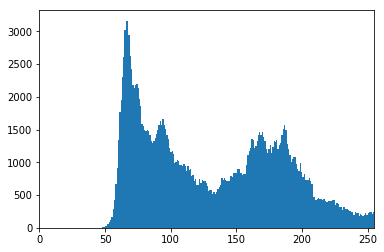

In [4]:
import cv2
from matplotlib import pyplot as plt

# Load
image_path = 'examples/images/rabbit.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Histogram & plot
plt.hist(image.ravel(), 256, [0, 255]);
plt.xlim([0, 255])
plt.show()

## Ejercicio No. 14

Tomar dos imagenes similares y graficar el histograma de cada una visualizando los puntos que comparten en comun.

### SOLUCIÓN 14

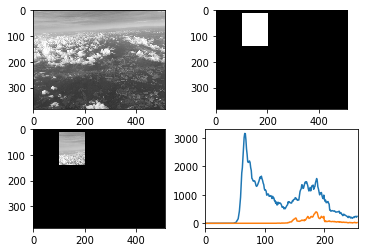

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

imagen = cv2.imread('images/clouds.jpg', 0)

mascara = np.zeros(imagen.shape[:2], np.uint8)
mascara[10:140, 100:200] = 255
mascara_imagen = cv2.bitwise_and(imagen, imagen, mask = mascara)

histograma_completo = cv2.calcHist([imagen],[0],None,[256],[0,256])
histograma_mascara = cv2.calcHist([imagen],[0],mascara,[256],[0,256])
 
plt.subplot(221), plt.imshow(imagen, 'gray')
plt.subplot(222), plt.imshow(mascara, 'gray')
plt.subplot(223), plt.imshow(mascara_imagen, 'gray')
plt.subplot(224), plt.plot(histograma_completo), plt.plot(histograma_mascara)
plt.xlim([0,256])
 
plt.show()

## 8.Template matching

Template matching es un método de procesamiento digital de imágenes para buscar y encontrar la localización/posición de una imagen template dentro de otra imagen. Es una técnica para encontrar pequeñas partes de una imagen que se ajusten a una imagen template.

<img src="http://nbviewer.jupyter.org/github/CAChemE/opencv-python/blob/master/images/template_matching.jpg">

OpenCV viene con una función para este propósito: cv2.matchTemplate. De forma resumida, el algoritmo símplemente desliza la imagen template sobre la imagen general, como si se tratara de una convolución 2D, y compara la plantilla con esa zona de la imagen. El resultado es una imagen en escala de grises donde cada píxel denota cuánto se aproxima a la imagen template atendiendo a su vecindario. Mediante la función cv2.minMaxLoc() se puede buscar posteriormente dónde está el máximo/mínimo para poder localizar la imagen.

En OpenCV existen varios métodos de comparación:

http://docs.opencv.org/3.1.0/df/dfb/group__imgproc__object.html#ga3a7850640f1fe1f58fe91a2d7583695d

## Ejemplo No. 15

Detección y localización de la señal de la imagen mediante template matching.

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('examples/images/hobbiton.jpg', 0)
img2 = img.copy()
template = cv2.imread('examples/images/template.png', 0)
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
           'cv2.TM_CCORR_NORMED','cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img, top_left, bottom_right, 255, 2)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

## Ejercicio No. 15

Descargar una imagen en la que se esté practicando algún deporte, recortar la cara de la jugadora o del jugador, y localizar esa cara en la imagen.

### SOLUCIÓN 15

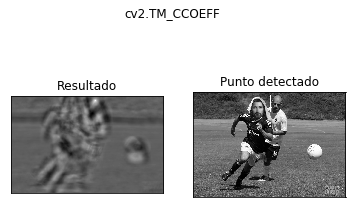

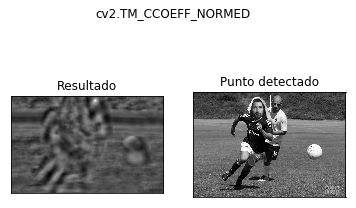

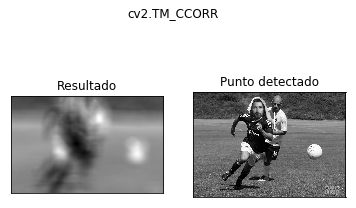

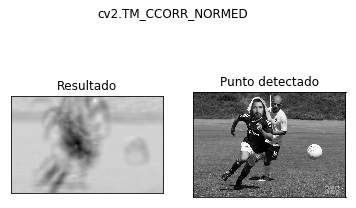

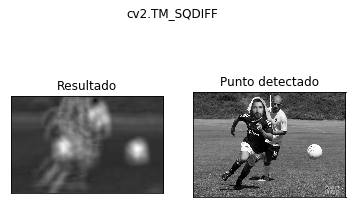

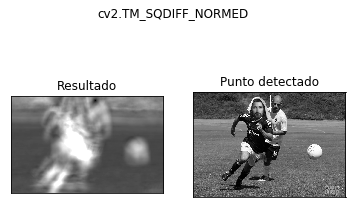

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

imagen = cv2.imread('images/futbol.jpg', 0)
imagen2 = imagen.copy()
template = cv2.imread('images/jugador.jpg', 0)
w, h = template.shape[::-1]

metodos = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
           'cv2.TM_CCORR_NORMED','cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in metodos:
    imagen = imagen2.copy()
    metodo = eval(meth)

    res = cv2.matchTemplate(imagen, template, metodo)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    if metodo in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        arriba_izquierda = min_loc
    else:
        arriba_izquierda = max_loc
    abajo_derecho = (arriba_izquierda[0] + w, arriba_izquierda[1] + h)

    cv2.rectangle(imagen, arriba_izquierda, abajo_derecho, 255, 2)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Resultado'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(imagen, cmap = 'gray')
    plt.title('Punto detectado'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

## 9. Detección de caras

La detección de objetos mediante el uso de clasificadores en cascada basados en la extracción de características con filtros de base Haar, es un método efectivo de detección de objetos propuesto por Paul Viola y Michael Jones en 2001. Es un método basado en las técnicas de aprendizaje automático donde una función cascada es entrenada mediante una gran cantidad de imágenes positivas y negativas, posibilitando la detección de objetos en otras imágenes. Las imágenes deben tener un tamaño prefijado.

<img src="http://nbviewer.jupyter.org/github/CAChemE/opencv-python/blob/master/images/face_detection.jpg" width="50%" height="50%">

Primero, un clasificador es entrenado con unos pocos cientos de ejemplos de un objeto en particular, en este caso caras, llamados ejemplos positivos. Además, también es entrenado con imágenes arbitrarias del mismo tamaño, llamadas ejemplos negativos.

Tras ser entrenado el clasificador, puede ser aplicado a una región de interés en una imagen de entrada. El clasificador generará como salida "1" si la región es como el objeto buscado o "0" en otro caso. Para buscar el objeto en la imagen completa, la ventana de búsqueda se moverá a traves de la imagen. Además, el clasificador está diseñado para poder cambiar su tamaño, para buscar objetos de diferentes tamaños.

Se denomina "en cascada" porque el clasificador está formado por varios clasificadores simples en diferentes etapas, los cuales son aplicados de forma sucesiva hasta que en una etapa se rechaza o por el contrario se avanza hasta el final.

OpenCV viene tanto con un entrenador como con un detector. Si se desea entrenar un clasificador propio para cualquier tipo de objeto (trenes, coches, perros, etc.), se puede utilizar OpenCV para crearlo. Además, OpenCV también viene muchos clasificadores previamente entrenados para caras, ojos, sonrisas, etc. Esos ficheros se encuentran almacenados en la siguiente ruta:

opencv/data/haarcascades/
Las funciones que proporciona OpenCV son las siguientes:

cv2.CascadeClassifier()
cv2.detectMultiScale()

## Ejemplo No. 16

Detección de caras Haar-cascade a través de la webcam.

In [ ]:
import cv2
import sys

# Load XML classifieres
cas_path = 'examples/haarcascade/haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(cas_path)

# Webcam
webcam_id = 0
video_capture = cv2.VideoCapture(webcam_id)

# Detect multi-scale flags
if cv2.__version__.startswith('2.4'):
    dmf_flag = cv2.cv.CV_HAAR_SCALE_IMAGE
else:
    dmf_flag = cv2.CASCADE_SCALE_IMAGE

while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()

    # Gray image
    gray_image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(
        gray_image,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30),
        flags=dmf_flag
    )

    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Display the resulting frame
    cv2.imshow('Video', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything is done, release the capture
video_capture.release()
cv2.destroyAllWindows()

## Ejercicio No. 16

Personalizar el rectangulo que reconoce las caras

### SOLUCIÓN 16

In [ ]:
#EJERCICIO FINALIZADO

import cv2
import sys

# Load XML classifieres
cas_path = 'xml/haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(cas_path)

# Webcam
video_file = 'video/personas_frente.mp4'
video_capture = cv2.VideoCapture(video_file)

# Detect multi-scale flags
if cv2.__version__.startswith('2.4'):
    dmf_flag = cv2.cv.CV_HAAR_SCALE_IMAGE
else:
    dmf_flag = cv2.CASCADE_SCALE_IMAGE

while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()

    # Gray image
    gray_image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(
        gray_image,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30),
        flags=dmf_flag
    )

    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 255, 0), 2)

    # Display the resulting frame
    cv2.imshow('Video', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything is done, release the capture
video_capture.release()
cv2.destroyAllWindows()

## Ejemplo No. 17

Detección de caras y ojos a través de la webcam.

In [ ]:
import cv2
import sys

# Load XML classifieres
cas_path = 'examples/haarcascade/haarcascade_frontalface_default.xml'
eye_path = 'examples/haarcascade/haarcascade_eye.xml'
face_cascade = cv2.CascadeClassifier(cas_path)
eye_cascade = cv2.CascadeClassifier(eye_path)

# Webcam
webcam_id = 0
video_capture = cv2.VideoCapture(webcam_id)

# Detect multi-scale flags
if cv2.__version__.startswith('2.4'):
    dmf_flag = cv2.cv.CV_HAAR_SCALE_IMAGE
else:
    dmf_flag = cv2.CASCADE_SCALE_IMAGE

while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()

    # Gray image
    gray_image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(
        gray_image,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30),
        flags=dmf_flag
    )

    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x,y), (x+w,y+h), (255,0,0), 2)
        
        # Detect eyes
        roi_gray = frame[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
    
        # Draw a rectangle around the eyes
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color, (ex,ey), (ex+ew,ey+eh), (0,255,0), 2)

    # Display the resulting frame
    cv2.imshow('Video', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything is done, release the capture
video_capture.release()
cv2.destroyAllWindows()

## Ejercicio No. 17

Personalizar el rectangulo que reconoce las caras y objetos y agregar textos

### SOLUCIÓN 17

In [ ]:
import cv2
import sys

# Load XML classifieres
cas_path = 'xml/haarcascade_frontalface_default.xml'
eye_path = 'xml/haarcascade_eye.xml'
face_cascade = cv2.CascadeClassifier(cas_path)
eye_cascade = cv2.CascadeClassifier(eye_path)

# Webcam
video_file = 'video/personas_frente.mp4'
video_capture = cv2.VideoCapture(video_file)

# Detect multi-scale flags
if cv2.__version__.startswith('2.4'):
    dmf_flag = cv2.cv.CV_HAAR_SCALE_IMAGE
else:
    dmf_flag = cv2.CASCADE_SCALE_IMAGE

while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()

    # Gray image
    gray_image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(
        gray_image,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30),
        flags=dmf_flag
    )

    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x,y), (x+w,y+h), (255,0,0), 2) 
        cv2.putText(frame,"Cara", (x,y), cv2.FONT_HERSHEY_SIMPLEX, 1, 255)
        
        # Detect eyes
        roi_gray = frame[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
    
        # Draw a rectangle around the eyes
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color, (ex,ey), (ex+ew,ey+eh), (0,255,0), 2)
            cv2.putText(frame,"Ojo", (ey,ex), cv2.FONT_HERSHEY_SIMPLEX, 1, 220)

    # Display the resulting frame
    cv2.imshow('Video', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything is done, release the capture
video_capture.release()
cv2.destroyAllWindows()

## 10.Colores y espacios de color

En OpenCV hay más de 150 métodos de conversión distintos entre espacios de colores. Hasta ahora, ya hemos aprendido a convertir imágenes RGB en escala de grises. Ahora vamos a aprender a convertir imágenes al espacio de color HSV (del inglés Hue, Saturation, Value – Matiz, Saturación, Valor).

Espacio de color RGB

<img src="http://nbviewer.jupyter.org/github/CAChemE/opencv-python/blob/master/images/rgb.png" width="40%" height="40%">

Espacio de color HSV

<img src="http://nbviewer.jupyter.org/github/CAChemE/opencv-python/blob/master/images/hsv.jpg" width="45%" height="45%">

Para la conversión del espacio de color, debemos utilizar la función cv2.cvtColor(input_image, flag), donde el flag indica el tipo de conversión a realizar. El flag para convertir de RGB a HSV es *cv2.COLOR_BGR2GRAY.

Seguimiento de objetos
Ahora que conocemos cómo convertir una imagen RGB a HSV, ya estamos en disposición de extraer objetos de un determinado color. En HSV, es más fácil representar un color que en el espacio de color RGB. El método para la extracción de objetos de un cierto color es el siguiente:

Obtención de cada frame del vídeo
Conversión del espacio de color: de RGB a HSV
Creación de una máscara de color
Extracción de la imagen aquellos objetos del color definido

## Ejemplo No. 18

Filtrado de colores.

In [ ]:
import cv2
import numpy as np

# Webcam
webcam_id = 0
cap = cv2.VideoCapture(webcam_id)

while True:
    _, frame = cap.read()

    # Convert BGR to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Define range in HSV
    lower_color = np.array([85, 50, 50])
    upper_color =  np.array([145, 255, 255])

    # Mask: threshold the HSV image to get only defined colors
    mask = cv2.inRange(hsv, lower_color, upper_color)

    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(frame, frame, mask=mask)

    # Show
    cv2.imshow('Frame', frame)
    cv2.imshow('Mask', mask)
    cv2.imshow('Color', res)

    # Exit?
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()
cap.release()

## Ejercicio No. 18

Descargar un vídeo y filtrar los objetos de un color determinado (https://videos.pexels.com/video-license).

### SOLUCIÓN 18

In [ ]:
#EJERCICIO TERMINADO

import cv2
import numpy as np

# Webcam
video_file = 'video/video.mp4'
cap = cv2.VideoCapture(video_file)

while True:
    _, frame = cap.read()

    # Convert BGR to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Define range in HSV
    lower_color = np.array([85, 70, 70])
    upper_color =  np.array([145, 145, 255])

    # Mask: threshold the HSV image to get only defined colors
    mask = cv2.inRange(hsv, lower_color, upper_color)

    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(frame, frame, mask=mask)

    # Show
    cv2.imshow('Frame', frame)
    cv2.imshow('Mask', mask)
    cv2.imshow('Color', res)

    # Exit?
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()
cap.release()

## 11. Detección y extracción de características (feature detection)

## 11.1. Features

La mayoría de vosotros/as alguna vez ha jugado a montar puzles. En ellos, partiendo de un gran número de pequeñas piezas de una imagen, se debe reconstruir la imagen original la cual tiene un tamaño mayor. La pregunta es ¿cómo eres capaz de resolverlo?

<img src="http://nbviewer.jupyter.org/github/CAChemE/opencv-python/blob/master/images/jigsaw_puzzle.jpg" width="40%" height="40%">

La respuesta está en la búsqueda de patrones específicos o características específicas que sean únicas, que puedan ser fácilmente rastreadas y comparadas. Si buscamos una definición para definir qué es una característica, encontraremos que es una tarea difícil de expresar en palabras, pero en el fondo sabemos qué son. Si alguien nos pregunta que le señalemos una buena característica para que pueda ser comparada entre varias imágenes, seguramente seremos capaces de señalarla. Esta es la razón por la cual los niños pequeños pueden simplemente jugar a montar puzles.

No existe una definición universal o exacta de qué constituye una característica, y la definición concreta a menudo depende del problema o del tipo de aplicación que se esté analizando. Dicho esto, una característica es definida como una parte interesante de una imagen, y suelen utilizarse como punto de partida para muchos algoritmos de visión por computador. Por tanto, al ser el punto de partida, la calidad global del algoritmo dependerá de lo bueno que sea su detector de características. Consecuentemente, la propiedad deseable para cualquier detector de características es la repetibilidad/reproducibilidad, es decir, si es capaz o no de detectar la misma características en dos o más imágenes diferentes de la misma escena.

El proceso de detección y extracción de características es una operación a bajo nivel y ocasionalmente puede ser computacionalmente costosa.

<img src="http://nbviewer.jupyter.org/github/CAChemE/opencv-python/blob/master/images/feature_building.jpg">

En la parte superior de la imagen anterior se muestran 6 pequeñas imágenes. Intenta buscar y localizar la posición de esas imágenes.

Como se puede observar, las imágenes A y B están repartidas por gran parte de la imagen. Es difícil encontrar la localización exacta de esas imágenes.
Las imágenes C y D son mucho más simples, ya que son bordes del edificio y es más fácil encontrar una posición aproximada, pero la posición exacta sigue siendo difícil de determinar. Esto es porque el patrón es el mismo a lo largo de todo el borde.
Finalmente, las imágenes E y F son diferentes esquinas del edificio y como se observa, es fácil determinar su posición. Por tanto, pueden ser consideradas como buenas features.

## 11.2. Harris corner detection

Como ya sabemos, las esquinas son regiones en la imagen con una gran variación en la intensidad en todas las direcciones. Una de las primeras aproximaciones para encontrar corners fue propuesta por Chris Harris y Mike Stephens en su publicación "A Combined Corner and Edge Detector" en 1988. Por tanto, hoy en día se le conoce como Harris Corner Detector.

<img src="http://nbviewer.jupyter.org/github/CAChemE/opencv-python/blob/master/images/harris_result.jpg">

OpenCV proporciona la función cv2.cornerHarris() para la localización de esquinas mediante el algoritmo propuesto por Chris Harris y Mike Stephens. Los argumentos de la función son los siguientes:

img - Imagen de entrada. Debe ser una imagen en escala de grises y de tipo float32.
blockSize - Es el tamaño de la vecindad considerada para la detección de esquinas.
ksize - Parámetro de apertura del filtro de Sobel.
k - Parámetro libre de la ecuación de Harris.

## Ejemplo No. 19

Detección de esquinas mediante el método de Harris.

In [2]:
import cv2
import numpy as np

filename = 'images/taj-noise.jpg'
img = cv2.imread(filename)

# RGB -> Grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Input image should be grayscale and float32 type
gray = np.float32(gray)

# Corner detection
dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]

# Show
cv2.imshow('dst', img)

# Exit?
if cv2.waitKey(0) & 0xFF == ord('q'):
    cv2.destroyAllWindows()

error: C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:11111: error: (-215) scn == 3 || scn == 4 in function cv::cvtColor


## Ejercicio No. 19

Descargar una imagen con un abundante número de corners y aplicar el algoritmo de Harris.

### SOLUCIÓN 19

In [ ]:
#EJERCICIO TERMINADO

import cv2
import numpy as np

filename = 'images/esquinas.jpg'
img = cv2.imread(filename)

# RGB -> Grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Input image should be grayscale and float32 type
gray = np.float32(gray)

# Corner detection
dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[1,228,235]

# Show
cv2.imshow('Esquinas', img)

# Exit?
if cv2.waitKey(0) & 0xFF == ord('q'):
    cv2.destroyAllWindows()

## 11.3.ORB (Oriented FAST and Rotated BRIEF)

ORB es un algoritmo creado en los "laboratorios de OpenCV", publicado en 2011 por Ethan Rublee, Vincent Rabaud, Kurt Konolige y Gary R. Bradski en el artículo "An efficient alternative to SIFT or SURF". Como indica el título del artículo, es una alternativa a los algoritmos SIFT y SURF de uso libre, ya que al estar patentados esos algoritmos, para utilizarlos hay que pagar un canon.

SIFT: http://docs.opencv.org/3.2.0/da/df5/tutorial_py_sift_intro.html
SURF: http://docs.opencv.org/3.2.0/df/dd2/tutorial_py_surf_intro.html
De forma resumida, podemos decir que ORB es una fusión del detector de esquinas FAST y el algoritmo BRIEF, con ciertas modificaciones, que también hace uso de detector de esquinas de Harris.

FAST: http://docs.opencv.org/3.2.0/df/d0c/tutorial_py_fast.html
BRIEF: http://docs.opencv.org/3.2.0/dc/d7d/tutorial_py_brief.html

<img src="http://nbviewer.jupyter.org/github/CAChemE/opencv-python/blob/master/images/orb.jpg" width="30%" heigth="30%">

Para crear un objeto de tipo ORB, OpenCV proporciona la función cv2.ORB(). Una vez creado, para detectar los keypoints y descriptors tendremos que utilizar el método orb.detectAndCompute(). Toda la información viene descrita en el siguiente enlace:

http://docs.opencv.org/3.1.0/d1/d89/tutorial_py_orb.html

## Ejemplo No. 20

Uso del algoritmo ORB para la detección de esquinas sobre una fotografía del castillo de Bratislava.

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Load image
path = 'images/castillo.jpg'
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

# Initiate ORB detector
if cv2.__version__.startswith('2.4'):
    orb = cv2.ORB()
else:
    orb = cv2.ORB_create()

# Find the keypoints and descriptors with ORB
kp, des = orb.detectAndCompute(img, None)

# Draw only keypoints location, not size and orientation
img2 = cv2.drawKeypoints(img, kp, None, color=(0, 255, 0), flags=0)
cv2.imshow('Keypoints', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Ejercicio No. 20

Aplicar los algoritmos ORB, SIFT y FAST y comparar visualmente los resultados que se obtienen.

### SOLUCIÓN 20

En esta parte podemos verificar que con la funcion X determinada se observa el patron de reconocimiento con el ORB el descriptor de muchas modificaciones para mejorar el rendimiento. Primero usa RÁPIDO para encontrar puntos clave, luego aplica la medida de la esquina de Harris para encontrar los N primeros puntos entre ellos. 
con SIFT Y FAST estan patentados para hacer uso de ellos, pero en teoria y practica el ORB es una muy buena opcion para implementar el uso de puntos claves.

## 11.4.Correspondencia entre características (Feature Matching)

A continuación describiremos la técnica de búsqueda de correspondencia entre características de diferentes imágenes Brute-Force matcher. El proceso es simple: se selecciona el descriptor de una característica en el primer conjunto y se compara con todas las características del segundo conjunto mediante un cálculo de distancias, devolviendo la característica que más se le aproxime.

<img src="http://nbviewer.jupyter.org/github/CAChemE/opencv-python/blob/master/images/bf_matcher.jpg" width="30%" heigth="30%">

En OpenCV, primero debemos crear el objeto BFMatcher mediante la función cv2.BFMatcher(). El método tiene dos parámetros: normType (método de cálculo de distancias) y crossCheck (devuelve los descriptores de ambos conjuntos). Una vez creado, el método BFMatcher.match() devolverá la mejor correspondencia. Por último, el método cv2.drawMatches() nos ayudará a dibujar las correspondencias, poniendo las dos imágenes juntas de forma horizontal y dibujando líneas entre las dos imágenes con las mejores correspondencias.

El resultado del método match es una lista de objetos de tipo DMatch. Este objeto tiene los siguientes atributos:

DMatch.distance - Distancia entre descriptores. Mejor cuanto menor sea.
DMatch.trainIdx - Índice del descriptor en la imagen train.
DMatch.queryIdx - Índice del descriptor en la imagen query
DMatch.imgIdx - Índice de la imágen train.

## Ejemplo No. 21

Correspondencia de características entre dos imágenes, mediante el método Brute-Force matcher.

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def drawMatches(img1, kp1, img2, kp2, matches):
    """
    My own implementation of cv2.drawMatches as OpenCV 2.4.9
    does not have this function available but it's supported in
    OpenCV 3.0.0

    This function takes in two images with their associated 
    keypoints, as well as a list of DMatch data structure (matches) 
    that contains which keypoints matched in which images.

    An image will be produced where a montage is shown with
    the first image followed by the second image beside it.

    Keypoints are delineated with circles, while lines are connected
    between matching keypoints.

    img1,img2 - Grayscale images
    kp1,kp2 - Detected list of keypoints through any of the OpenCV keypoint 
              detection algorithms
    matches - A list of matches of corresponding keypoints through any
              OpenCV keypoint matching algorithm
    """

    # Create a new output image that concatenates the two images together
    # (a.k.a) a montage
    rows1 = img1.shape[0]
    cols1 = img1.shape[1]
    rows2 = img2.shape[0]
    cols2 = img2.shape[1]

    out = np.zeros((max([rows1,rows2]),cols1+cols2,3), dtype='uint8')

    # Place the first image to the left
    out[:rows1,:cols1] = np.dstack([img1, img1, img1])

    # Place the next image to the right of it
    out[:rows2,cols1:] = np.dstack([img2, img2, img2])

    # For each pair of points we have between both images
    # draw circles, then connect a line between them
    for mat in matches:

        # Get the matching keypoints for each of the images
        img1_idx = mat.queryIdx
        img2_idx = mat.trainIdx

        # x - columns
        # y - rows
        (x1,y1) = kp1[img1_idx].pt
        (x2,y2) = kp2[img2_idx].pt

        # Draw a small circle at both co-ordinates
        # radius 4
        # colour blue
        # thickness = 1
        cv2.circle(out, (int(x1),int(y1)), 4, (255, 0, 0), 1)   
        cv2.circle(out, (int(x2)+cols1,int(y2)), 4, (255, 0, 0), 1)

        # Draw a line in between the two points
        # thickness = 1
        # colour blue
        cv2.line(out, (int(x1),int(y1)), (int(x2)+cols1,int(y2)), (255, 0, 0), 1)


    # Show the image
    cv2.imshow('Matched Features', out)
    cv2.waitKey(0)
    cv2.destroyWindow('Matched Features')

    # Also return the image if you'd like a copy
    return out

# Query image
img1 = cv2.imread('examples/images/r2d2.jpg', 0)
# Train image
img2 = cv2.imread('examples/images/starwars.jpg', 0)

# Initiate ORB detector
if cv2.__version__.startswith('2.4'):
    orb = cv2.ORB()
else:
    orb = cv2.ORB_create()

# Find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1, des2)

# Sort them in ascending order of their distances so that best 
# matches (with low distance) come to front
matches = sorted(matches, key = lambda x:x.distance)

# Then we draw only first 10 matches (Just for sake of visibility
drawMatches(img1, kp1, img2, kp2, matches[:10])

## Ejercicio No. 21

Descargar un par de fotos de internet en la que la imagen query aparezca dentro de la imagen train. Aplicar el algoritmo Brute-Force matcher.

### SOLUCIÓN 21

Podemos observar que en este tipo de entrenamiento se puede verificar caracteristicas con distancias las cuales se procede a calcular y entrenar para determinar que parte de la imagen se parece mas a la que se esta visualizando y de tal manera indicar distancia y la parte de la imagen a la que se parece mucho mas.

## 12. Aprendizaje automático

## 12.1. k-Nearest Neighbour

El método kNN (k-nearest neighbour o k-vecinos más cercanos) es uno de los algoritmos de clasificación más simples dentro de los métodos de clasificación supervisada. Este es un método de clasificación no paramétrico, que estima el valor de la función de densidad de probabilidad o directamente la probabilidad a posteriori de que un elemento x pertenezca a la clase Cj a partir de la información proporcionada por el conjunto de prototipos.

<img src="http://nbviewer.jupyter.org/github/CAChemE/opencv-python/blob/master/images/knn.png" width="30%" heigth="30%">

En la imagen, vemos dos tipos de objetos, los cuadrados azules y los triángulos rojos. A cada tipo de objeto distinto lo llamamos clase. Los objetos son mostrados en un plano al que llamaremos feature space.

Ahora imaginemos que queremos clasificar un nuevo objeto (círculo verde), teniendo que elegir si pertenece al grupo de objetos azules o rojos. A este proceso lo llamamos clasificación. El algoritmo va a intentar clasificar al objeto nuevo dependiendo de cuáles sean los vecinos más cercanos, que dependerá del parámetro k. En cuanto a la elección de este parámetro, dependerá fundamentalmente de los datos; generalmente, valores grandes de k reducen el efecto de ruido en la clasificación, pero crean límites entre clases parecidas.

El método kNN está disponible en OpenCV. Lo primero que tenemos que hacer es obtener una instancia mediante el método knn = cv2.KNearest(). Tras esto, deberemos realizar el proceso de entrenamiento mediante el método knn.train(). Por último, para realizar el proceso de clasificación haremos uso del método knn.find_nearest().

## Ejemplo No. 22

Ejemplo de clasificación mediante el algoritmo k-nearest neighbour (kNN).

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
 
# Feature set containing (x,y) values of 25 known/training data
trainData = np.random.randint(0, 100, (25, 2)).astype(np.float32)

# Labels each one either Red or Blue with numbers 0 and 1
responses = np.random.randint(0, 2, (25, 1)).astype(np.float32)
 
# Take Red families and plot them
red = trainData[responses.ravel()==0]
plt.scatter(red[:,0], red[:,1], 80, 'r', '^')

# Take Blue families and plot them
blue = trainData[responses.ravel()==1]
plt.scatter(blue[:,0], blue[:,1], 80, 'b', 's')

# New object
newcomer = np.random.randint(0, 100, (1, 2)).astype(np.float32)
plt.scatter(newcomer[:,0], newcomer[:,1], 80, 'g', 'o')

# Classification
k = 5
if cv2.__version__.startswith('2.4'):
    knn = cv2.KNearest()
    knn.train(trainData, responses)
    ret, results, neighbours, dist = knn.find_nearest(newcomer, k)
else:
    knn = cv2.ml.KNearest_create()
    knn.train(trainData, cv2.ml.ROW_SAMPLE, responses)
    ret, results, neighbours, dist = knn.findNearest(newcomer, k)

print("result: " + str(results))
print("neighbours: " + str(neighbours))
print("distance: " + str(neighbours))

plt.show()

## Ejercicio No. 22

Que puede concluir despues de correr el algoritmo anterior

### SOLUCIÓN 22

Observamos que despues de correr el algoritmo notamos que nos imprime unas coordenas de una imagen , y a su vez nos imprime el tamaño de la imagen creada al igual que los pixeles que la conforman sobre su  eje que serian las coordenadas del sistema alto X alto Y.

## 12.2. K-means

El algoritmo de las K-medias (K-means en inglés), presentado por MacQueen en 1967, es uno de los algoritmos de aprendizaje no supervisado más simples para resolver el problema de la clusterización. El procedimiento aproxima por etapas sucesivas un cierto número (prefijado) de clusters haciendo uso de los centroides de los puntos que deben representar.

¿Cómo funciona?

Considera el conjunto de datos de la siguiente imagen. Se requiere clasificar estos datos en dos grupos diferentes.

<img src="http://nbviewer.jupyter.org/github/CAChemE/opencv-python/blob/master/images/k-means1.jpg" width="40%" heigth="40%">

En el primer paso, el algoritmo escoge dos centroides, C1 y C2. Tras esto, en el segundo paso, el algoritmo calculará la distancia desde cada punto a cada uno de los centroides. Si uno de los datos está más cerca de C1, entonces ese dato se le asignará la etiqueta del centroide C1. Si por el contrario está más cerca del centroide C2, en ese caso se le asignará la etiqueta del centroide C2.

<img src="http://nbviewer.jupyter.org/github/CAChemE/opencv-python/blob/master/images/k-means2.jpg" width="40%" heigth="40%">

En el tercer paso del algoritmo, para cada uno de los centroides, se realiza el cálculo de la media de todos los puntos asignados a ese centroide, siendo ésta la nueva posición a la que se desplazará el centroide (centro de masas).

<img src="http://nbviewer.jupyter.org/github/CAChemE/opencv-python/blob/master/images/k-means3.jpg" width="40%" heigth="40%">

Por último, los pasos dos y tres serán iterados hasta que todos los centroides converjan a puntos fijos. Además, también pueden aplicarse otros criterios de parada, como son el número máximo de iteraciones o la obtención de una precisión determinada.

El resultado final sería el siguiente:

<img src="http://nbviewer.jupyter.org/github/CAChemE/opencv-python/blob/master/images/k-means4.jpg" width="40%" heigth="40%">

OpenCV proporciona la función cv2.kmeans() para la clusterización de datos mediante el algoritmo de las K-medias.

Los parámetros de entrada del algoritmo son los siguientes:

samples: datos de entrada (tipo de dato np.float32).
nclusters: número de clusters requeridos al final de la ejecución.
criteria: criterio de parada.
attempts: número de veces que el algoritmo es ejecutado utilizando diferentes inicializaciones.
flags: indica cómo son los centroides elegidos al inicio.
Los parámetros de salida del algoritmo son los siguientes:

compactness: suma de la distancia cuadrática desde cada punto hasta su correspondiente centroide.
labels: array con las etiquetas.
centers: array de centroides de los clusters.

## Ejemplo No. 23

El problema de la talla de camiseta (http://docs.opencv.org/3.1.0/de/d4d/tutorial_py_kmeans_understanding.html y http://docs.opencv.org/3.1.0/d1/d5c/tutorial_py_kmeans_opencv.html).

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

X = np.random.randint(25, 53, (25, 2))
Y = np.random.randint(57, 85, (25, 2))
Z = np.vstack((X,Y))

# Convert to np.float32
Z = np.float32(Z)

# Define criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# Define number of cluters
K = 2

# Attempts
attempts = 10

# Apply kmeans
if cv2.__version__.startswith('2.4'):
    ret, label, center = cv2.kmeans(Z, K, criteria, attempts, cv2.KMEANS_RANDOM_CENTERS)
else:
    ret, label, center = cv2.kmeans(Z, K, None, criteria, attempts, cv2.KMEANS_RANDOM_CENTERS)

# Now separate the data, Note the flatten()
A = Z[label.ravel() == 0]
B = Z[label.ravel() == 1]

# Plot the data
plt.figure(1)

plt.subplot(211)
plt.scatter(A[:,0], A[:,1], c = 'gray')
plt.scatter(B[:,0], B[:,1], c = 'gray')
plt.xlabel('Height')
plt.ylabel('Weight')

plt.subplot(212)
plt.scatter(A[:,0], A[:,1])
plt.scatter(B[:,0], B[:,1], c = 'r')
plt.scatter(center[:,0], center[:,1], s = 80, c = 'y', marker = 's')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

## Ejercicio No. 23

Que puede concluir despues de correr el algoritmo anterior

### SOLUCIÓN 23

Observamos que despues de correr el algoritmo notamos que nos imprime unas coordenas de una imagen , y a su vez nos imprime el tamaño de la imagen creada al igual que los pixeles que la conforman sobre sus dos ejes que serian las coordenadas del sistema alto X alto Y y su bajo  .

## 12.2.1. Color Quantization

En el campo de gráficos por computador o visión artificial, se denomina color quantization al proceso de reducción del número de colores distintos presentes en una imagen, utilizado usualmente con la intención de obtener una nueva imagen que sea visualmente similar a la imagen original pero con un menor número de colores, consiguiendo de esta forma reducir el tamaño de la imagen. Muchas veces, algunos dispositivos tienen la limitación de producir únicamente un conjunto reducido de colores. En esos casos, se puede realizar el proceso de cuantización para reducir los colores, haciendo uso del algoritmo k-means.

A continuación se presenta un ejemplo de cuantización. Aquí tendremos tres características, es decir, los tres canales de color R,G,B. Por tanto, necesitamos hacer un reshape de la imagen a un array de tamaño Mx3 (siendo M el número de píxeles de la imagen). Después de realizar la clusterización, se aplicarán los valores de los centroides a todos los píxeles, obteniendo una imagen con el número de colores especificado (K).

## Ejemplo No. 24

Cuantización de colores de una imagen.

In [ ]:
import numpy as np
import cv2
 
img = cv2.imread('images/machu_picchu.jpg')
Z = img.reshape((-1,3))
 
# Convert to np.float32
Z = np.float32(Z)

# Define criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# Define number of clusters(K) 
K = 8

# Attempts
attempts = 10

# Apply kmeans
if cv2.__version__.startswith('2.4'):
    ret, label, center = cv2.kmeans(Z, K, criteria, attempts, cv2.KMEANS_RANDOM_CENTERS)
else:
    ret, label, center = cv2.kmeans(Z, K, None, criteria, attempts, cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
final_image = res.reshape((img.shape))

cv2.imshow('Original image', img)
cv2.imshow('Color Quantization', final_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Ejercicio No. 24

Que puede concluir despues de correr el algoritmo anterior

### SOLUCIÓN 24

Lo que podemos notar es que el momento de impresion de la imagen, imprime la original sin ningun tipo de modificacion o alteracion, luego
en la segunda impresion notamos un gran cambio que se asemeja a un tipo de degradacion o algo mas parecido a un filtro que es lo mas utilizado
en las camaras al momento de modificarlas.

Guía Base => http://nbviewer.jupyter.org/github/CAChemE/opencv-python/blob/master/opencv-and-python.ipynb#10.-Colores-y-espacios-de-color